### 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X.shape

(100, 2)

In [4]:
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100)

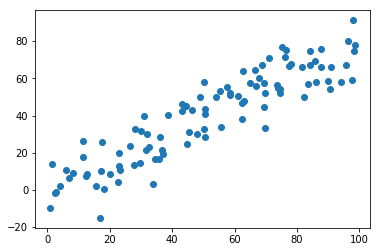

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean

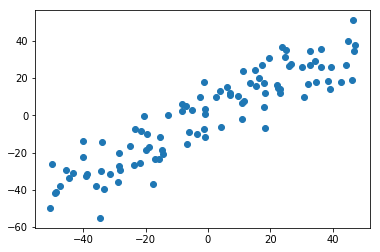

In [8]:
def demean(X):
    return X - np.mean(X,axis=0)

X_demean = demean(X)

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

In [9]:
np.mean(X_demean[:,0])

1.2398970739013749e-14

In [10]:
np.mean(X_demean[:,1])

1.1830536550405668e-14

### 梯度上升法

In [11]:
def f(w,X):
    return np.sum((X.dot(w)** 2)) / len(X)

In [12]:
def df_math(w,X):
    return X.T.dot(X.dot(w))*2. / len(X)

In [13]:
def df_debug(w,X,epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1,X) - f(w_2,X)) / (2 * epsilon)
    return res

In [19]:
# 将w转化成单位向量
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)# 每次求一次单位向量
        if abs(f(w,X) - f(last_w,X)) < epsilon:
            break
        
        cur_iter += 1
        
    return w

In [20]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.96606905, 0.31466411])

In [21]:
eta = 0.01

In [22]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.7601973 , 0.64969229])

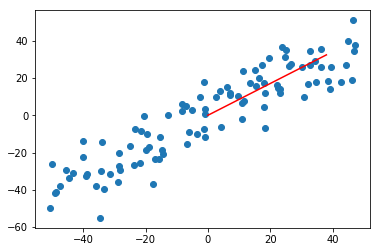

In [25]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],color='r')
plt.show()

### 极端情况

In [26]:
X2 = np.empty((100,2))

X2[:,0] = np.random.uniform(0.,100.,size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

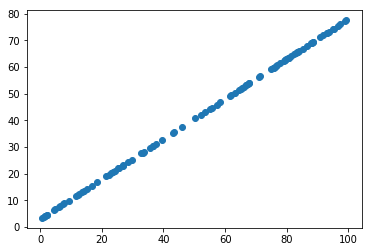

In [27]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [28]:
X2_demean = demean(X2)

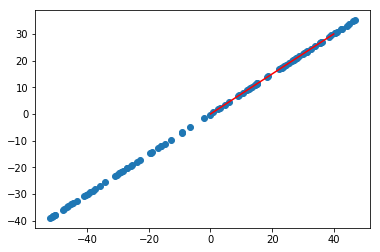

In [29]:
w = gradient_ascent(df_math,X2_demean,initial_w,eta)

plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w[0]*50],[0,w[1]*50],color='r')
plt.show()

In [30]:
w

array([0.80000001, 0.59999999])